In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Load in Labeled Dataset

In [2]:
dfR = pd.read_csv(r'dfRLabelled.csv')
dfR.head(3)

,Unnamed: 0.1,Unnamed: 0,Product,Reviewer Name,Rating,Text,Date,Country,ASIN,Language,Rules,Label
0,0,0,"Wireless Earbuds, yobola Bluetoth Earbuds, IPX...",Will of Burr,1.0 out of 5 stars,"I am a real fan of headphones, probably becaus...",11/17/2022,United States 🇺🇸,B09LCVHCVX,en,"3, 4, 5, 7 :",Suspicious
1,1,1,"Wireless Earbuds, yobola Bluetoth Earbuds, IPX...",Allen Pak,5.0 out of 5 stars,To be honest. I wasn't expecting much when I ...,10/25/2022,United States 🇺🇸,B09LCVHCVX,en,NaN,Not Suspicious
2,2,2,"Wireless Earbuds, yobola Bluetoth Earbuds, IPX...",brenda,5.0 out of 5 stars,1st off they connected very easily which is al...,11/29/2022,United States 🇺🇸,B09LCVHCVX,en,"3, 4, 6 :",Suspicious


In [3]:
dfR.shape

(2055, 12)

### Remove Reviews with No Text

In [4]:
dfR = dfR[dfR['Text'].notna()]
dfR.shape

(2011, 12)

# Product rating

### Create Product Rating Column

In [5]:
# Creates Column Stars w/ Rating from 1-5 (-1,1)
dfR['Stars'] = dfR['Rating'].str[:1]
dfR.Stars = dfR.Stars.astype(int)

### Table of Product Rating Averages

In [6]:
GdfRM = dfR.pivot_table(values='Stars',columns=['Label'],aggfunc='mean').round(3)
GdfRM

Label,Not Suspicious,Suspicious
Stars,4.03,4.193


In [7]:
dfR.groupby('Label')['Stars'].describe()

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
Not Suspicious,1525.0,4.029508,1.489172,1.0,4.0,5.0,5.0,5.0
Suspicious,486.0,4.193416,1.359062,1.0,4.0,5.0,5.0,5.0


### Boxplots Grouped by Label

Not Suspicious         Axes(0.1,0.15;0.363636x0.75)
Suspicious        Axes(0.536364,0.15;0.363636x0.75)
dtype: object

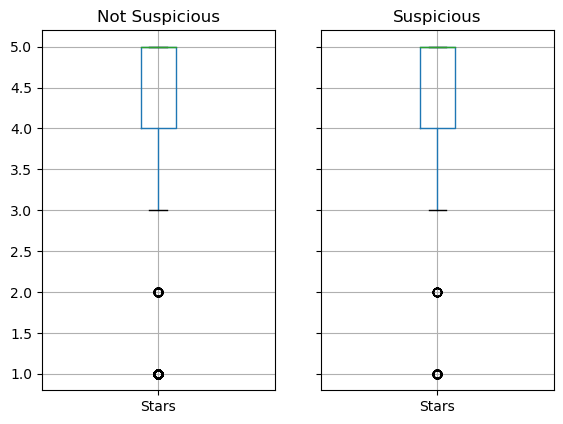

In [22]:
d = dfR.groupby('Label')
d.boxplot(column=['Stars'])

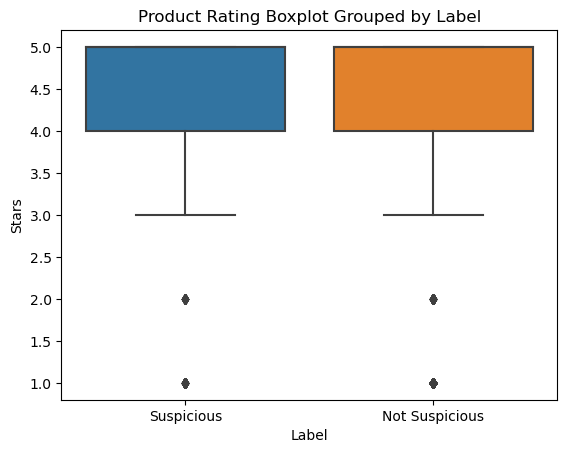

In [10]:
sns.boxplot(x='Label', y='Stars', data=dfR)
plt.title('Product Rating Boxplot Grouped by Label')
plt.show()

# Sentiment

### Creates Vader Sentiment Column

In [23]:
# Creates Column for Vader Sentiment
analyzer = SentimentIntensityAnalyzer()
dfR['Vader Sentiment'] = [analyzer.polarity_scores(x)['compound'] for x in dfR['Text']]

### Table of Sentiment Averages

In [24]:
GdfRS = dfR.pivot_table(values='Vader Sentiment',columns=['Label'],aggfunc='mean').round(3)
GdfRS

Label,Not Suspicious,Suspicious
Vader Sentiment,0.552,0.595


In [25]:
dfR.groupby('Label')['Vader Sentiment'].describe()

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
Not Suspicious,1525.0,0.551804,0.480677,-0.9681,0.3792,0.7579,0.90200,0.9935
Suspicious,486.0,0.595319,0.370308,-0.9658,0.4404,0.6935,0.87995,0.9949


### Boxplots Grouped by Label

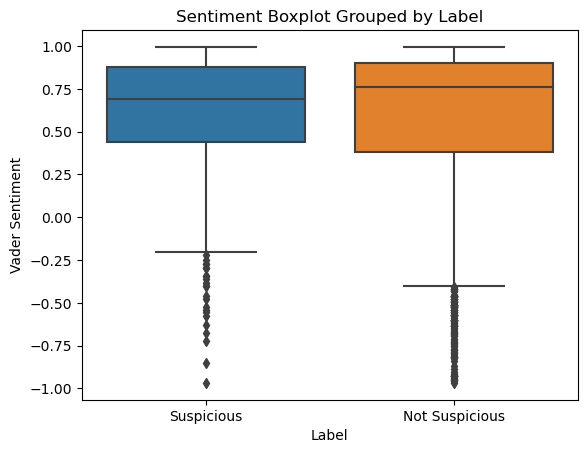

In [26]:
sns.boxplot(x='Label', y='Vader Sentiment', data=dfR)
plt.title('Sentiment Boxplot Grouped by Label')
plt.show()